Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.



In [2]:
# Importing the Seaborn library for advanced data visualization (as sns)
import seaborn as sns

# Importing the Matplotlib library for basic plotting functionalities (as plt)
import matplotlib.pyplot as plt

# Importing the Pandas library for data manipulation and analysis (as pd)
import pandas as pd

# Importing the NumPy library for numerical operations (as np)
import numpy as np

In [3]:
df = pd.read_csv( r"C:\Users\nahia\OneDrive\Escritorio\Bootcamp\Week2\Labs\lab-eda-univariate\amz_uk_price_prediction_dataset.csv")

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [6]:
import pandas as pd

In [7]:
print(type(df))
print(df.head())
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  
Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBest

In [8]:
table = pd.crosstab(df['category'], df['isBestSeller'])

In [9]:
print(table)

isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [10]:
crosstab_result = pd.crosstab(index= df.category, columns= df.isBestSeller)
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


# Statistical Tests:

#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [11]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
from scipy.stats import chi2_contingency

In [14]:
_, chi2_pvalue, _, _  = chi2_contingency(crosstab_result)

In [15]:
a,b,c,d=chi2_contingency(crosstab_result)

In [16]:
type(chi2_pvalue)

numpy.float64

In [17]:
float(chi2_pvalue)

0.0

### p value is smaller than 0.05 (or alpha) we do have a correlation between 2 categorical variables

### Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:



In [18]:
from scipy.stats.contingency import association

In [19]:
association(crosstab_result, method='cramer')

0.1222829439760564

### Cramér’s V Interpretation Guide (Cohen's Conventions)

| Cramér’s V | Strength of Association   |
|------------|----------------------------|
| 0.00–0.10  | Negligible / Very Weak     |
| 0.10–0.20  | Weak                       |
| 0.20–0.30  | Moderate                   |
| 0.30–0.50  | Strong                     |
| > 0.50     | Very Strong                |

### The correlation is weak

### Visualize the relationship between product categories and the best-seller status using a stacked bar chart

In [30]:
# Importing the Seaborn library for advanced data visualization (as sns)
import seaborn as sns

# Importing the Matplotlib library for basic plotting functionalities (as plt)
import matplotlib.pyplot as plt

# Importing the Pandas library for data manipulation and analysis (as pd)
import pandas as pd

# Importing the NumPy library for numerical operations (as np)
import numpy as np

In [31]:
df = pd.read_csv( r"C:\Users\nahia\OneDrive\Escritorio\Bootcamp\Week2\Labs\lab-eda-univariate\amz_uk_price_prediction_dataset.csv")

In [38]:
crosstab_result = pd.crosstab(index= df.category, columns= df.isBestSeller)
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [43]:
crosstab_result = pd.crosstab(index=df['category'], columns=df['isBestSeller'])
max_bestseller_category = crosstab_result[True].idxmax()
max_bestseller_value = crosstab_result[True].max()

print("Category with more Best Sellers:", max_bestseller_category)
print("Number of Best Sellers:", max_bestseller_value)

Category with more Best Sellers: Grocery
Number of Best Sellers: 556


C:\Users\nahia\AppData\Local\Temp\ipykernel_24460\2211095973.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = crosstab_result.groupby('bin')[[False, True]].sum()


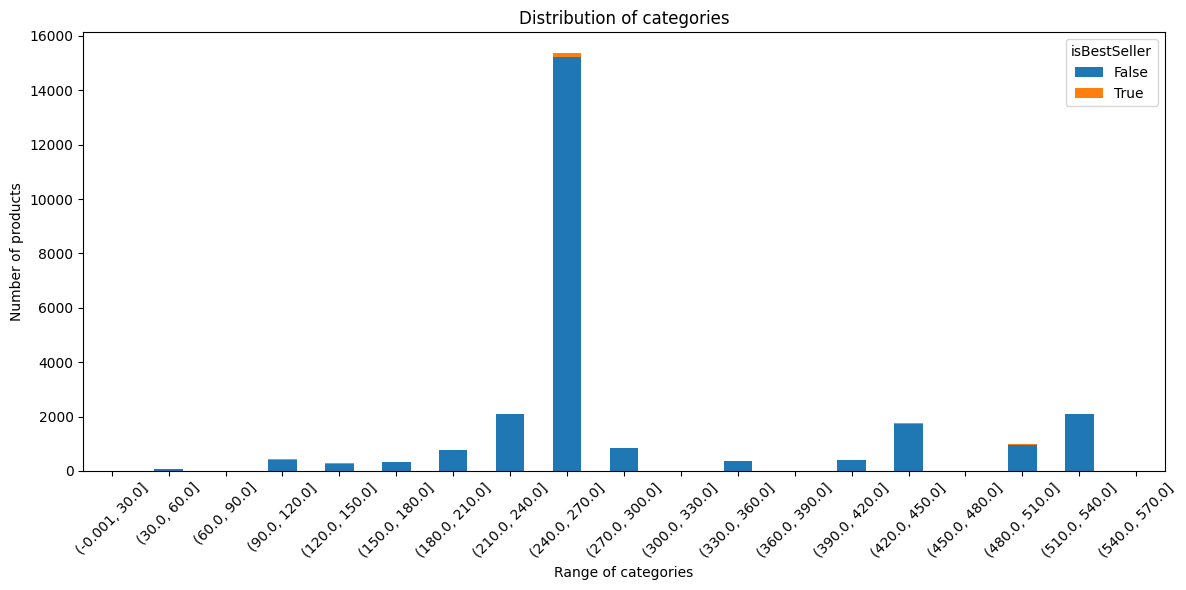

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

crosstab_result['total'] = crosstab_result.sum(axis=1)

bins = np.arange(0, 556 + 30, 30)  

crosstab_result['bin'] = pd.cut(crosstab_result['total'], bins=bins, include_lowest=True)

binned = crosstab_result.groupby('bin')[[False, True]].sum()

binned.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Distribution of categories")
plt.xlabel("Range of categories")
plt.ylabel("Number of products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.



In [24]:
df_subset = df[['category', 'price']]
print(df_subset.head())

         category  price
0  Hi-Fi Speakers  21.99
1  Hi-Fi Speakers  23.99
2  Hi-Fi Speakers  21.99
3  Hi-Fi Speakers  31.99
4  Hi-Fi Speakers  17.99


In [25]:
import pandas as pd

In [26]:
Q1 = df_subset['price'].quantile(0.25)
Q3 = df_subset['price'].quantile(0.75)
IQR = Q3 - Q1

In [27]:
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)


Q1: 9.99
Q3: 45.99
IQR: 36.0


In [49]:
import pandas as pd


df_filtered = df_subset[(df_subset['price'] >= Q1) & (df_subset['price'] <= Q3)]

print(f"original size: {len(df_subset)} rows")
print(f"filtered size (without outliers): {len(df_filtered)} rows")


print(df_filtered.head())

original size: 2443651 rows
filtered size (without outliers): 1254291 rows
         category  price
0  Hi-Fi Speakers  21.99
1  Hi-Fi Speakers  23.99
2  Hi-Fi Speakers  21.99
3  Hi-Fi Speakers  31.99
4  Hi-Fi Speakers  17.99


#### Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

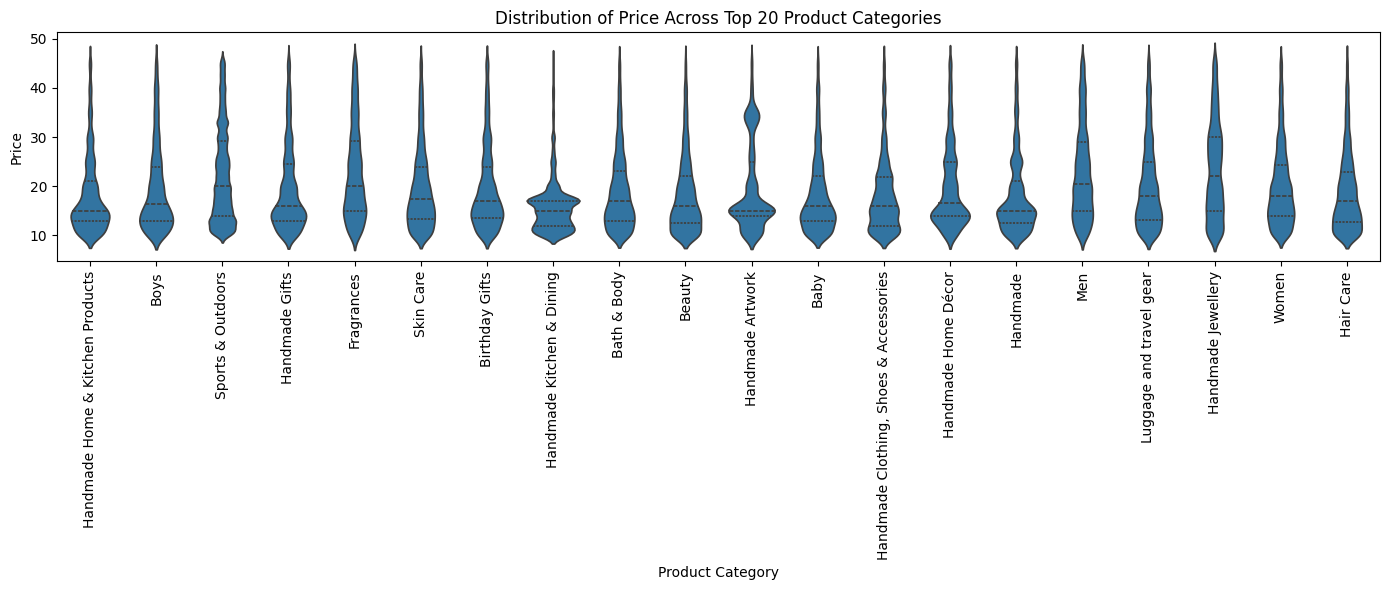

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find top 20 categories by frequency
top20_categories = df_filtered['category'].value_counts().head(20).index

# Filter dataset
df_top20 = df_filtered[df_filtered['category'].isin(top20_categories)]

# Create violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_top20, x='category', y='price', inner='quartile')
plt.xticks(rotation=90)
plt.title("Distribution of Price Across Top 20 Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

### Which product category tends to have the highest median price? Don't filter here by top categories.

In [53]:
median_prices = df.groupby('category')['price'].median().sort_values(ascending=False)

print("Top 10 categories by median price:")
print(median_prices.head(10))

highest_median_category = median_prices.idxmax()
highest_median_value = median_prices.max()

print(f"\nThe category with the highest median price is '{highest_median_category}' with a median price of {highest_median_value:.2f}.")

Top 10 categories by median price:
category
Laptops                                1042.725
Desktop PCs                             810.400
Snowboards                              366.725
Home Audio Record Players               326.080
3D Printers                             319.000
Motorbike Exhaust & Exhaust Systems     313.830
Graphics Cards                          259.980
Snowboard Boots                         258.990
Lenses                                  249.990
Barebone PCs                            244.990
Name: price, dtype: float64

The category with the highest median price is 'Laptops' with a median price of 1042.72.
